# Sentiment analysis on movie reviews

#### Dataset 
 Movie reviews from IMDb(Internet movie database).The dataset obtained from http://ai.stanford.edu/~amaas/data/sentiment/.
 The data set contains 50,000 movie reviews labeled whether they are positive or negative based on the content.

#### Approach
A classification analysis on reviews to predict the sentiment positive or negative.The task
is to predict the sentiment of 15,000 labeled movie reviews and use the remaining 35,000 
reviews for training the supervised models.The techniques used include text preprocessing,
normalization and in-depth analysis of models using python's built in packages and custom 
modules like text_normalizer and model_evaluation_utils(source credit: Practical Machine Learning with Python: A Problem-Solver's Guide to Building Real-World Intelligent SystemsBook by Dipanjan Sarkar, Raghav Bali, and Tushar Sharma. https://github.com/dipanjanS/practical-machine-learning-with-python/tree/master/notebooks/Ch07_Analyzing_Movie_Reviews_Sentiment) 

In [4]:
# Import necessary dependencies
import pandas as pd
import numpy as np
import scipy
import sklearn
import text_normalizer as tn #custom developed module for text pre-processing/normalization
import model_evaluation_utils as meu #custom developed module for supervised model fitting,
#prediction and evaluation.
import nltk
import spacy
import re

In [5]:
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata

nlp = spacy.load('en', parse = False, tag=False, entity=False)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [6]:
nltk.download('all',halt_on_error=False)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\j

[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons

[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package tagsets is already up-to-date!
[nltk_data]    | Downloading package snowball_data to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\jisha\AppData\Roaming\nltk_data...
[nltk_data]    |  

True

### Load and normalize data



In [7]:
#loading data
data = pd.read_csv(r'movie_reviews.csv')
# take a peek at the data
print(data.head(10))


                                              review sentiment
0  Far from combining the best bits of Pontypool ...  negative
1  Where do I begin? I first saw this film in 199...  positive
2  I don't know how this movie has received so ma...  negative
3  I jotted down a few notes here on THE FIRST PO...  negative
4  NOROI follows a documentary filmmaker, Masafum...  positive
5  "Nat" (voiced by Trevor Gagnon), along with hi...  negative
6  The main attraction of Anywhere but Here is th...  positive
7  What can I say? Curse of Monkey Island is fant...  positive
8  Fred "The Hammer" Williamson delivers another ...  negative
9  I once saw a bit of this film, and was interes...  negative


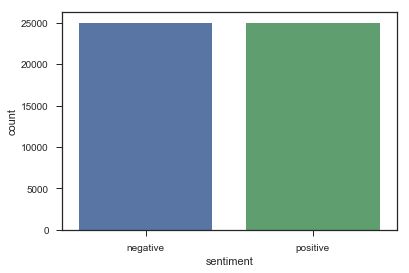

In [8]:
#Plotting the count of sentiment
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.countplot(x="sentiment", data=data)

#### Text pre-processing and normalization
Normalizing  movie review data includes creating functions to remove HTML tags,accented characters,expanding contractions,removing special characters,lemmatization to get the root word and removing stopwords.Then using all these components and tie them together in the function called normalize_corpus which can be used to take a document corpus as input and return the same corpus with cleaned and normalized text documents.

Reference - practical-machine-learning-with-python/notebooks/Ch07_Analyzing_Movie_Reviews_Sentiment/Text Normalization Demo.ipynb

#### Cleaning Text - strip HTML

In [9]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

#### Removing accented characters


In [10]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

#### Expanding Contractions

In [11]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

#### Removing Special Characters

In [12]:
def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

#### Lemmatizing text

In [13]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

#### Removing Stopwords

In [14]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#### Normalize text corpus - tying it all together

In [15]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
            # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters    
        if special_char_removal:
            doc = remove_special_characters(doc)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

#### Steps for supervised sentiment analysis
1. Prepare train and test datasets
2. Text pre-processing
3. Feature engineering
4. Model training 
5. Model prediction and evaluation

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Creating feature arrays
reviews = np.array(data['review'])
sentiments = np.array(data['sentiment'])

The data is split in to train and test .The train set contains 35,000 reviews (70% of data) intended for training and the test set has 15,000 reviews (30% of data) for testing the classifier.

In [18]:
# build train and test datasets
train_reviews = reviews[:35000]
train_sentiments = sentiments[:35000]
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]


Used the custom normalization module to normalize the review datasets

In [19]:
# normalize  review datasets using custom normalization module(tn) 
norm_train_reviews = tn.normalize_corpus(train_reviews)
norm_test_reviews = tn.normalize_corpus(test_reviews)
#Approximate run time for this code is one hour

In [20]:
# Taking a look at the normalized train data
norm_train_reviews

['far combine good bit pontypool 28 day manage ignore whilst shamelessly copy make sense pontypool different get progressively tenser stink radio dj must stay air spend effectively no time air sit bottom watch tv news far bad excuse zombie movie ever single person usa indeed world not know zombie ever hear word zombie well 50th minute bunch misfit still call zombie infected one one rabie word zombie may make guest appearance later could care less maybe copyright pay use certain word like bluetooth earphone call ear thingy kid not finish no plot no acting no one care waste time shameless poorly execute rip',
 'begin first see film 1995 no idea expect actually time search film elijah wood star one come highly recommend sit watch film not know think watch second time day later floodgate open never life ever really cry watch film blub every high low film rid right alongside emotional roller coaster strike emotional chord many level intense sadness elation see film wonder innocence childhoo

In [21]:
# Taking a look at the normalized test data
norm_test_reviews

['almost not rent bad comment anyways think similar darkness fall also like part hat tooth ferry 2 red neck brother gas station funny dialog make laugh not comedy ruin movie bit unnecessary rest movie way horror suspense film make good see way bad movie one simple story believable acting not scary gory movie not tick want refund watch dvd preview movie look good go check',
 'sorry excuse film remind great deal hear gigli ben jen flop earlier summer order clearly edit unconscionable degree scene rather form cohesive provoking film appear collection disconnected sequence little forward semblance unify plot heath ledger fan 10 thing hate knight tale particularly support role monster ball man need find good agent keep accept script like order four feather go fast track movie oblivion problem film firstly director try make inadequacy essential plot introduce two plot line seemingly little anything well much anything plot skein involve american try take vatican dark pope mildly interesting n

### Analysing topic models

The first step in this analysis is to combine the normalized train and test reviews and separate out these reviews in to positive and negative reviews.
Second step is extract features from positive and negative reviews using TF-IDF feature vectorizer.

### Extract features from positive and negative reviews

TF-IDF - “Term Frequency — Inverse Data Frequency”

Term Frequency (tf): gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document.

Inverse Data Frequency (idf): used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score.


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# consolidate all normalized reviews
norm_reviews = norm_train_reviews+norm_test_reviews
# get tf-idf features for only positive reviews
positive_reviews = [review for review, sentiment in zip(norm_reviews, sentiments) if sentiment == 'positive']
ptvf = TfidfVectorizer(use_idf=True, min_df=0.05, max_df=0.95, ngram_range=(1,1), sublinear_tf=True)
# min_df=0.05, max_df=0.95 speed up topic modeling process and remove features that either occur too much or too rarely.
ptvf_features = ptvf.fit_transform(positive_reviews)
# get tf-idf features for only negative reviews
negative_reviews = [review for review, sentiment in zip(norm_reviews, sentiments) if sentiment == 'negative']
ntvf = TfidfVectorizer(use_idf=True, min_df=0.05, max_df=0.95, ngram_range=(1,1), sublinear_tf=True)
ntvf_features = ntvf.fit_transform(negative_reviews)
# view feature set dimensions
print(ptvf_features.shape, ntvf_features.shape)

(25000, 332) (25000, 334)


### Topic Modeling

For topic modeling we use the NMF class from scikit-learn and pyLDAvis for building interactive visualizations of topic models. Also some utility functions from topic-model-utils module to display the results in a clean format.
##### NMF (Nonnegative Matrix Factorization)
NMF decomposition of the term-document matrix would yield components that could be considered “topics”, and decompose each document into a weighted sum of topics.
Imagine if you wanted to decompose a term-document matrix, where each column represented a document, and each element in the document represented the weight of a certain word (the weight might be the raw count or the tf-idf weighted count or some other encoding scheme).What happens when we decompose this into two matrices? Imagine if the documents came from news articles. The word “eat” would be likely to appear in food-related articles, and therefore co-occur with words like “tasty” and “food”. Therefore, these words would probably be grouped together into a “food” component vector, and each article would have a certain weight of the “food” topic.

##### pyLDAvis - Python library for interactive topic model visualization
pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The
package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

In [24]:
import pyLDAvis #Python library for interactive topic model visualization.
import pyLDAvis.sklearn
from sklearn.decomposition import NMF # NMF(Nonnegative Matrix Factorization)
import gensim
import topic_model_utils as tmu # to display the results in clean format

pyLDAvis.enable_notebook()
total_topics = 10 #limiting the topic number 

### Display and visualize topics for positive reviews

In [25]:
# build topic model on positive sentiment review features
pos_nmf = NMF(n_components=total_topics, 
          random_state=42, alpha=0.1, l1_ratio=0.2)
pos_nmf.fit(ptvf_features)      
# extract features and component weights
pos_feature_names = ptvf.get_feature_names()
pos_weights = pos_nmf.components_
# extract and display topics and their components
pos_topics = tmu.get_topics_terms_weights(pos_weights, pos_feature_names)
tmu.print_topics_udf(topics=pos_topics,
                 total_topics=total_topics,
                 num_terms=15,
                 display_weights=False)

Topic #1 without weights
['like', 'think', 'not', 'really', 'say', 'get', 'go', 'would', 'know', 'thing', 'people', 'bad', 'want', 'could', 'much']

Topic #2 without weights
['movie', 'good', 'great', 'see', 'watch', 'not', 'one', 'enjoy', 'acting', 'ever', 'recommend', 'make', 'like', 'fan', 'think']

Topic #3 without weights
['year', 'time', 'see', 'dvd', 'first', 'still', 'old', 'remember', 'release', 'would', 'come', 'since', 'watch', 'ever', 'day']

Topic #4 without weights
['show', 'episode', 'series', 'tv', 'good', 'watch', 'great', 'one', 'fan', 'not', 'new', 'character', 'ever', 'original', 'first']

Topic #5 without weights
['play', 'role', 'performance', 'actor', 'cast', 'good', 'star', 'great', 'excellent', 'give', 'well', 'support', 'john', 'also', 'actress']

Topic #6 without weights
['film', 'see', 'not', 'one', 'make', 'great', 'good', 'horror', 'cinema', 'director', 'recommend', 'must', 'ever', 'art', 'highly']

Topic #7 without weights
['character', 'scene', 'story', 

In [26]:
pyLDAvis.sklearn.prepare(pos_nmf, ptvf_features, ptvf, R=15) #Visualizing topic models on positive reviews

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.108177  0.073290       1        1  13.796966
6     -0.098495 -0.039039       2        1  13.326849
8     -0.190796  0.024454       3        1  12.387653
5      0.182391 -0.097064       4        1  10.923192
1      0.271943  0.030816       5        1  10.916329
2     -0.122954 -0.008024       6        1  10.265699
4     -0.007251 -0.185329       7        1   9.869008
9      0.059804  0.295658       8        1   6.697284
3      0.083974 -0.055791       9        1   6.337933
7     -0.070440 -0.038971      10        1   5.479087, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
198   Default  2829.000000         movie  2829.000000  15.0000  15.0000
109   Default  2845.000000          film  2845.000000  14.0000  14.0000
182   Default  2027.000000          love  2027.000000  13.0000  13.0000
120   Default  1124.000000         funny  1124.000000  12.0000  12.0000
265   Default  1390.000000          show  1390.000000  11.0000  11.0000
56    Default  1008.000000        comedy  1008.000000  10.0000  10.0000
86    Default   869.000000       episode   869.000000   9.0000   9.0000
260   Default   843.000000        series   843.000000   8.0000   8.0000
165   Default   760.000000         laugh   760.000000   7.0000   7.0000
226   Default   904.000000          play   904.000000   6.0000   6.0000
281   Default  1106.000000         story  1106.000000   5.0000   5.0000
248   Default   675.000000          role   675.000000   4.0000   4.0000
220   Default   770.000000   performance   770.000000   3.0000   3.0000
329   Default   705.000000          year   705.000000   2.0000   2.0000
125   Default  1931.000000          good  1931.000000   1.0000   1.0000
189    Topic1   176.574883         maybe   215.216654   1.7828  -4.7290
250    Topic1   503.026721           say   664.777235   1.7019  -3.6821
19     Topic1   162.100501      anything   229.452554   1.6332  -4.8145
290    Topic1   380.487560         thing   543.693669   1.6238  -3.9613
26     Topic1   311.325431           bad   461.332666   1.5874  -4.1619
190    Topic1   163.477787          mean   255.340465   1.5348  -4.8061
272    Topic1   243.849115     something   381.253634   1.5338  -4.4062
291    Topic1   574.729427         think   905.250982   1.5264  -3.5488
130    Topic1   196.933161        happen   310.892478   1.5241  -4.6199
80     Topic1   114.359119          else   181.236055   1.5203  -5.1634
127    Topic1   249.920807           guy   406.276861   1.4948  -4.3816
161    Topic1   412.042531          know   671.163484   1.4928  -3.8816
271    Topic1   128.429459       someone   210.074736   1.4886  -5.0474
231    Topic1   205.710613        pretty   342.658798   1.4705  -4.5763
240    Topic1   522.081004        really   908.966852   1.4262  -3.6449
...       ...          ...           ...          ...      ...      ...
314    Topic9   193.170809         watch  1376.920685   0.7946  -3.8613
125    Topic9   224.235162          good  1931.076332   0.6055  -3.7121
126    Topic9   170.537183         great  1662.046914   0.4818  -3.9859
50     Topic9   114.717554     character   978.968017   0.6146  -4.3824
214    Topic9   148.068820           one  1642.966550   0.3520  -4.1272
89     Topic9    98.388470          ever   826.125289   0.6308  -4.5359
210    Topic9   120.180992           not  2048.013470  -0.0770  -4.3358
114    Topic9    92.008835         first   717.480521   0.7048  -4.6030
120   Topic10  1117.343017         funny  1124.683485   2.8977  -1.9605
56    Topic10   957.083066        comedy  1008.763827   2.8516  -2.1153
165   Topic10   710.477380         laugh   760.980439   2.8356  -2.4133
149   Topic10   240.693823         humor   374.412148   2.4624  -3.4957
119   Topic10   273.062387           fun   591.680966   2.1310  -3.36

### Display and visualize topics for negative reviews

In [27]:
# build topic model on negative sentiment review features
neg_nmf = NMF(n_components=10, 
          random_state=42, alpha=0.1, l1_ratio=0.2)
neg_nmf.fit(ntvf_features)      
# extract features and component weights
neg_feature_names = ntvf.get_feature_names()
neg_weights = neg_nmf.components_
# extract and display topics and their components
neg_topics = tmu.get_topics_terms_weights(neg_weights, neg_feature_names)
tmu.print_topics_udf(topics=neg_topics,
                 total_topics=total_topics,
                 num_terms=15,
                 display_weights=False)

Topic #1 without weights
['get', 'go', 'man', 'take', 'know', 'guy', 'kill', 'come', 'woman', 'back', 'people', 'girl', 'one', 'thing', 'around']

Topic #2 without weights
['bad', 'ever', 'see', 'acting', 'movie', 'one', 'terrible', 'awful', 'even', 'act', 'horrible', 'plot', 'make', 'no', 'script']

Topic #3 without weights
['film', 'not', 'make', 'see', 'would', 'director', 'time', 'watch', 'many', 'may', 'one', 'good', 'say', 'feel', 'think']

Topic #4 without weights
['book', 'read', 'story', 'version', 'base', 'write', 'change', 'love', 'not', 'would', 'original', 'movie', 'never', 'many', 'see']

Topic #5 without weights
['movie', 'watch', 'not', 'think', 'would', 'good', 'waste', 'time', 'see', 'like', 'could', 'say', 'money', 'make', 'want']

Topic #6 without weights
['funny', 'comedy', 'laugh', 'joke', 'try', 'not', 'stupid', 'suppose', 'fun', 'moment', 'like', 'really', 'black', 'even', 'annoying']

Topic #7 without weights
['play', 'actor', 'role', 'cast', 'good', 'performan

In [28]:
pyLDAvis.sklearn.prepare(neg_nmf, ntvf_features, ntvf, R=15)  #Visualizing topic models on negative reviews

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.028335 -0.026334       1        1  17.629142
4     -0.027036  0.167032       2        1  13.788449
7     -0.023391 -0.098358       3        1  11.855986
2     -0.104168  0.031804       4        1  11.639813
6     -0.046697 -0.167470       5        1  10.391534
1      0.238945  0.193316       6        1   9.780355
8      0.138628 -0.120656       7        1   8.313171
9     -0.112472  0.025855       8        1   6.739046
5      0.142045 -0.095496       9        1   5.725958
3     -0.177519  0.090307      10        1   4.136545, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
107   Default  2231.000000        film  2231.000000  15.0000  15.0000
28    Default  2115.000000         bad  2115.000000  14.0000  14.0000
261   Default  1388.000000        show  1388.000000  13.0000  13.0000
117   Default  1247.000000       funny  1247.000000  12.0000  12.0000
37    Default  1014.000000        book  1014.000000  11.0000  11.0000
55    Default   935.000000      comedy   935.000000  10.0000  10.0000
89    Default  1151.000000        ever  1151.000000   9.0000   9.0000
231   Default   695.000000        read   695.000000   8.0000   8.0000
158   Default   841.000000       laugh   841.000000   7.0000   7.0000
190   Default  2275.000000       movie  2275.000000   6.0000   6.0000
49    Default  1031.000000   character  1031.000000   5.0000   5.0000
149   Default   664.000000        joke   664.000000   4.0000   4.0000
79    Default   626.000000      effect   626.000000   3.0000   3.0000
314   Default  1206.000000       watch  1206.000000   2.0000   2.0000
277   Default   930.000000       story   930.000000   1.0000   1.0000
152    Topic1   261.314661        kill   331.027370   1.4991  -4.6076
320    Topic1   248.039357       woman   319.750120   1.4817  -4.6597
119    Topic1   240.197830        girl   318.480143   1.4535  -4.6918
141    Topic1   139.220389       house   189.532356   1.4271  -5.2372
136    Topic1   118.830380        home   165.816712   1.4024  -5.3956
27     Topic1   246.386018        back   347.905832   1.3906  -4.6664
244    Topic1   185.325745         run   263.792870   1.3826  -4.9512
177    Topic1   307.070204         man   437.284410   1.3821  -4.4462
20     Topic1   211.743077      around   307.749526   1.3617  -4.8179
131    Topic1   149.368077        head   226.307702   1.3201  -5.1669
72     Topic1   136.143452         die   207.912810   1.3122  -5.2596
21     Topic1   105.163334         ask   163.766482   1.2927  -5.5178
157    Topic1   112.073482       later   179.342652   1.2655  -5.4541
67     Topic1   129.895521        dead   208.120527   1.2642  -5.3066
108    Topic1    91.129030     finally   149.921829   1.2378  -5.6610
...       ...          ...         ...          ...      ...      ...
100    Topic9    53.803258        fall   296.236609   1.1543  -5.0634
114    Topic9    61.112119      friend   347.981808   1.1207  -4.9360
130    Topic9    67.250557        hard   386.049037   1.1126  -4.8403
202    Topic9   173.052197         not  2327.665670   0.2611  -3.8952
207    Topic9    71.149000         old   494.995682   0.9204  -4.7840
233    Topic9    93.517533      really   986.218336   0.5044  -4.5106
165    Topic9    94.369384        like  1362.383956   0.1904  -4.5015
88     Topic9    82.874896        even  1216.670449   0.1736  -4.6314
37    Topic10  1014.535734        book  1014.535734   3.1853  -1.8014
231   Topic10   613.079578        read   695.708612   3.0589  -2.3051
29    Topic10   124.230497        base   296.852867   2.3142  -3.9015
48    Topic10   112.498839      change   283.420624   2.2613  -4.0007
306   Topic10   141.974412     version   390.462415   2.1736  -3.7680
327   Topic10   123.979340       write   534.731742   1.7237  -3.9035
296   Topic10    53

The visualizations shows 10 models from positive and negative reviews.The visualizations are interactive(if using jupyter notebook)and you can click on any of the bubbles representing topics in the Intertopic Distance Map on the left and see the most relevant terms in each of the topics in the right bar chart.
Multi-Dimension Scaling (MDS) is used in the plot on the left shows similar topics should be close to one another and dissimilar topics should be far apart.The size of each topic bubble is based on the frequency of that topic and its components in the overall corpus.
The visualization on the right shows the top terms.When no topic is selected it shows the top 15 most salient topics in the corpus.The term's saliency is defined as a measure of how frequently the term appears the corpus and its distinguishing factor when used to distinguish between topics.The relevancy metric can be changed based on the slider on top of the bar chart.

### Machine learning models and evaluation

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier

Feature engineering techniques is based on the bag of words and TF-IDF models. 
For classification we will be using  Logistic regression.

In [30]:
# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
#Build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)
print('BOW model:> Train features shape:', cv_train_features.shape,
      'Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape,
      'Test features shape:', tv_test_features.shape)


BOW model:> Train features shape: (35000, 2095520) Test features shape: (15000, 2095520)
TFIDF model:> Train features shape: (35000, 2095520) Test features shape: (15000, 2095520)


In [31]:
# build Logistic Regression model
lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
#svm = SGDClassifier(loss='hinge', n_iter=100)

For building  logistic regression model on train features and evaluation on test features we use the utility function train_predict_model() from our custom model_evaluation_utils module. 

In [32]:
#Logistic Regression model on BOW features
lr_bow_predictions = meu.train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
# Model performance metrics for lofgistic regression on Bag of Words features
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,
                                      classes=['positive', 'negative'])


Model Performance metrics:
------------------------------
Accuracy: 0.9053
Precision: 0.9053
Recall: 0.9053
F1 Score: 0.9053

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.90      0.91      0.91      7537
   negative       0.91      0.90      0.90      7463

avg / total       0.91      0.91      0.91     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6860      677
        negative        744     6719


##### The logistic regression model got 90% accuracy And F1-score 91% on our BOW models

In [33]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = meu.train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=train_sentiments,
                                               test_features=tv_test_features, test_labels=test_sentiments)
# Model performance metrics for logistic regression on TF-IDF features
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions,
                                      classes=['positive', 'negative'])


Model Performance metrics:
------------------------------
Accuracy: 0.8944
Precision: 0.8945
Recall: 0.8944
F1 Score: 0.8944

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.89      0.90      0.90      7537
   negative       0.90      0.88      0.89      7463

avg / total       0.89      0.89      0.89     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6813      724
        negative        860     6603


##### The TF-IDF model got accuracy And F1-score 89%

### Deep learning models

In [3]:
# Modified C:\Users\jisha\.keras\keras.json to use theano as backend. For theano, prerequisites-"conda install m2w64-toolchain"
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"
# created, conda create --name myenv and set running 'activate myenv'
import warnings
warnings.filterwarnings('ignore')
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder

### Prediction class label encoding
For the deep learning models we use the one-hot encoding to change the sentiment labels to numeric representations.

In [34]:
le = LabelEncoder()
num_classes=2 
# tokenize train reviews & encode train labels
tokenized_train = [tn.tokenizer.tokenize(text)
                   for text in norm_train_reviews]
y_tr = le.fit_transform(train_sentiments)
y_train = keras.utils.to_categorical(y_tr, num_classes)
# tokenize test reviews & encode test labels
tokenized_test = [tn.tokenizer.tokenize(text)
                   for text in norm_test_reviews]
y_ts = le.fit_transform(test_sentiments)
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [35]:
# print class label encoding map and encoded labels
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))
print('Sample test label transformation:\n'+'-'*35,
      '\nActual Labels:', test_sentiments[:3], '\nEncoded Labels:', y_ts[:3], 
      '\nOne hot encoded Labels:\n', y_test[:3])

Sentiment class label map: {'negative': 0, 'positive': 1}
Sample test label transformation:
----------------------------------- 
Actual Labels: ['positive' 'negative' 'positive'] 
Encoded Labels: [1 0 1] 
One hot encoded Labels:
 [[0. 1.]
 [1. 0.]
 [0. 1.]]


This output shows how our sentiment classification labels have been encoded to numeric representations then converted in to one-hot encoded vectors

### Feature Engineering with word embeddings
Here we are going to use 2 models for feature engineering. word2vec model and GloVe model.  
##### Word embeddings
Word embeddings are vectors that represent words. For example the word "dog" might be represented as [0.1, -2.1, 1.2] whilst "cat" might be represented as [0.2, 2.4, 1.1]. These vectors are important in neural networks because neural networks can only work with continuous numbers whereas words are discrete symbols.

word2vec - The purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace. That is, it detects similarities mathematically. Word2vec creates vectors that are distributed numerical representations of word features, features such as the context of individual words.word2vec is based on one of two flavours: The continuous bag of words model (CBOW) and the skip-gram model. CBOW is a neural network that is trained to predict which word fits in a gap in a sentence.The skip-gram model works in the other way round. Given a middle word it predicts which words surround it.These tasks are meant to force the neural network to create embeddings that reflect the relationship between words, hence bestowing them with meaning.

GloVe (Global Vectors) - GloVe takes a different approach. Instead of extracting the embeddings from a neural network that is designed to perform a surrogate task (predicting neighbouring words), the embeddings are optimized directly so that the dot product of two word vectors equals the log of the number of times the two words will occur near each other (within 5 words for example). For example if "dog" and "cat" occur near each other 10 times in a corpus, then vec(dog) dot vec(cat) = log(10). This forces the vectors to somehow encode the frequency distribution of which words occur near them.  

In [36]:
# build word2vec model
w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=150,
                                   min_count=10, sample=1e-3)    

In [37]:
# Function to compute averaged word vector representations for corpus of text documents
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [38]:
# To ignore ipykernel_launcher.py Deprecation warning __getitem__ warning
import warnings
warnings.filterwarnings('ignore')
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=500)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=500)

In [39]:
# The following code leverages spacy to get the GloVe embeddings
# feature engineering with GloVe model
train_nlp = [tn.nlp(item) for item in norm_train_reviews]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [tn.nlp(item) for item in norm_test_reviews]
test_glove_features = np.array([item.vector for item in test_nlp])
# Running time for above code chunk took approximately one and half hours

In [40]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)
print('GloVe model:> Train features shape:', train_glove_features.shape, ' Test features shape:', test_glove_features.shape)

Word2Vec model:> Train features shape: (35000, 500)  Test features shape: (15000, 500)
GloVe model:> Train features shape: (35000, 384)  Test features shape: (15000, 384)


### Building Deep neural network architecture
Here we build a deep neural network on the word2vec and GloVe model features

In [41]:
# Fully connected deep neural network model.
# The function leverages keras on top of theano to build the DNN model
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(num_input_features,)))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(2))
    dnn_model.add(Activation('softmax'))

    dnn_model.compile(loss='categorical_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])
    return dnn_model


In [42]:
# building the DNN model based on word2vec inputfeature representations for training reviews
w2v_dnn = construct_deepnn_architecture(num_input_features=500)

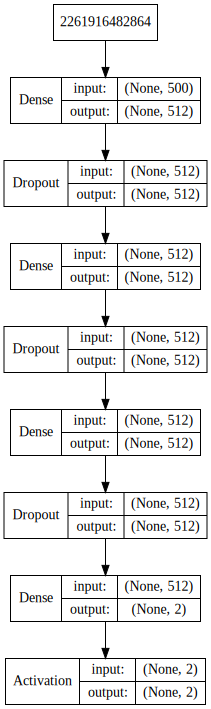

In [43]:
 ### Visualize the DNN model architecture
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(w2v_dnn, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

#### Model Training, Prediction and Performance Evaluation

In [44]:
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, y_train, epochs=5, batch_size=batch_size, 
            shuffle=True, validation_split=0.1, verbose=1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/5


21700/31500 [===================>..........] - ETA: 27s - loss: 0.7087 - acc: 0.45 - ETA: 22s - loss: 0.7121 - acc: 0.48 - ETA: 22s - loss: 0.6684 - acc: 0.56 - ETA: 20s - loss: 0.6341 - acc: 0.61 - ETA: 20s - loss: 0.6007 - acc: 0.65 - ETA: 20s - loss: 0.5718 - acc: 0.67 - ETA: 20s - loss: 0.5556 - acc: 0.69 - ETA: 19s - loss: 0.5417 - acc: 0.70 - ETA: 19s - loss: 0.5184 - acc: 0.71 - ETA: 19s - loss: 0.5074 - acc: 0.73 - ETA: 19s - loss: 0.4938 - acc: 0.74 - ETA: 19s - loss: 0.4811 - acc: 0.75 - ETA: 18s - loss: 0.4699 - acc: 0.75 - ETA: 18s - loss: 0.4660 - acc: 0.76 - ETA: 18s - loss: 0.4655 - acc: 0.76 - ETA: 18s - loss: 0.4502 - acc: 0.77 - ETA: 18s - loss: 0.4475 - acc: 0.77 - ETA: 18s - loss: 0.4508 - acc: 0.77 - ETA: 18s - loss: 0.4499 - acc: 0.77 - ETA: 17s - loss: 0.4450 - acc: 0.78 - ETA: 17s - loss: 0.4437 - acc: 0.78 - ETA: 17s - loss: 0.4419 - acc: 0.78 - ETA: 17s - loss: 0.4396 - acc: 0.78 - ETA: 16s - loss: 0.4361 - acc: 0.79 - ETA: 16s - loss: 0.4336 - acc: 0.79 - ETA

31500/31500 [==============================] - ETA: 5s - loss: 0.3179 - acc: 0.863 - ETA: 5s - loss: 0.3181 - acc: 0.863 - ETA: 5s - loss: 0.3179 - acc: 0.863 - ETA: 5s - loss: 0.3181 - acc: 0.863 - ETA: 5s - loss: 0.3183 - acc: 0.863 - ETA: 5s - loss: 0.3185 - acc: 0.863 - ETA: 5s - loss: 0.3185 - acc: 0.863 - ETA: 5s - loss: 0.3184 - acc: 0.863 - ETA: 5s - loss: 0.3179 - acc: 0.863 - ETA: 5s - loss: 0.3176 - acc: 0.863 - ETA: 5s - loss: 0.3183 - acc: 0.863 - ETA: 5s - loss: 0.3179 - acc: 0.863 - ETA: 5s - loss: 0.3177 - acc: 0.863 - ETA: 5s - loss: 0.3174 - acc: 0.863 - ETA: 5s - loss: 0.3169 - acc: 0.864 - ETA: 4s - loss: 0.3171 - acc: 0.864 - ETA: 4s - loss: 0.3177 - acc: 0.864 - ETA: 4s - loss: 0.3175 - acc: 0.864 - ETA: 4s - loss: 0.3173 - acc: 0.864 - ETA: 4s - loss: 0.3168 - acc: 0.864 - ETA: 4s - loss: 0.3164 - acc: 0.864 - ETA: 4s - loss: 0.3168 - acc: 0.864 - ETA: 4s - loss: 0.3168 - acc: 0.864 - ETA: 4s - loss: 0.3168 - acc: 0.864 - ETA: 4s - loss: 0.3167 - acc: 0.864 - ETA

22700/31500 [====================>.........] - ETA: 17s - loss: 0.2860 - acc: 0.90 - ETA: 19s - loss: 0.3000 - acc: 0.89 - ETA: 19s - loss: 0.2926 - acc: 0.88 - ETA: 16s - loss: 0.2813 - acc: 0.88 - ETA: 16s - loss: 0.2674 - acc: 0.88 - ETA: 17s - loss: 0.2714 - acc: 0.89 - ETA: 17s - loss: 0.2654 - acc: 0.89 - ETA: 17s - loss: 0.2731 - acc: 0.88 - ETA: 17s - loss: 0.2629 - acc: 0.89 - ETA: 17s - loss: 0.2737 - acc: 0.88 - ETA: 17s - loss: 0.2724 - acc: 0.88 - ETA: 17s - loss: 0.2694 - acc: 0.88 - ETA: 17s - loss: 0.2746 - acc: 0.88 - ETA: 17s - loss: 0.2804 - acc: 0.88 - ETA: 17s - loss: 0.2788 - acc: 0.88 - ETA: 17s - loss: 0.2804 - acc: 0.88 - ETA: 17s - loss: 0.2774 - acc: 0.88 - ETA: 17s - loss: 0.2806 - acc: 0.88 - ETA: 17s - loss: 0.2835 - acc: 0.88 - ETA: 17s - loss: 0.2828 - acc: 0.88 - ETA: 17s - loss: 0.2861 - acc: 0.88 - ETA: 17s - loss: 0.2848 - acc: 0.88 - ETA: 17s - loss: 0.2831 - acc: 0.88 - ETA: 17s - loss: 0.2829 - acc: 0.88 - ETA: 16s - loss: 0.2863 - acc: 0.87 - ETA

31500/31500 [==============================] - ETA: 4s - loss: 0.2864 - acc: 0.881 - ETA: 4s - loss: 0.2862 - acc: 0.881 - ETA: 4s - loss: 0.2864 - acc: 0.881 - ETA: 4s - loss: 0.2865 - acc: 0.881 - ETA: 4s - loss: 0.2866 - acc: 0.881 - ETA: 4s - loss: 0.2865 - acc: 0.881 - ETA: 4s - loss: 0.2865 - acc: 0.881 - ETA: 4s - loss: 0.2867 - acc: 0.881 - ETA: 4s - loss: 0.2865 - acc: 0.881 - ETA: 4s - loss: 0.2865 - acc: 0.881 - ETA: 4s - loss: 0.2870 - acc: 0.881 - ETA: 4s - loss: 0.2872 - acc: 0.881 - ETA: 4s - loss: 0.2874 - acc: 0.881 - ETA: 4s - loss: 0.2875 - acc: 0.881 - ETA: 3s - loss: 0.2871 - acc: 0.881 - ETA: 3s - loss: 0.2871 - acc: 0.881 - ETA: 3s - loss: 0.2877 - acc: 0.881 - ETA: 3s - loss: 0.2880 - acc: 0.881 - ETA: 3s - loss: 0.2881 - acc: 0.881 - ETA: 3s - loss: 0.2880 - acc: 0.881 - ETA: 3s - loss: 0.2882 - acc: 0.881 - ETA: 3s - loss: 0.2879 - acc: 0.881 - ETA: 3s - loss: 0.2876 - acc: 0.880 - ETA: 3s - loss: 0.2878 - acc: 0.880 - ETA: 3s - loss: 0.2876 - acc: 0.881 - ETA

22300/31500 [====================>.........] - ETA: 19s - loss: 0.3107 - acc: 0.87 - ETA: 19s - loss: 0.2912 - acc: 0.87 - ETA: 15s - loss: 0.2812 - acc: 0.88 - ETA: 16s - loss: 0.2939 - acc: 0.88 - ETA: 17s - loss: 0.2753 - acc: 0.89 - ETA: 17s - loss: 0.2770 - acc: 0.89 - ETA: 17s - loss: 0.2658 - acc: 0.89 - ETA: 15s - loss: 0.2579 - acc: 0.89 - ETA: 16s - loss: 0.2610 - acc: 0.89 - ETA: 16s - loss: 0.2640 - acc: 0.89 - ETA: 16s - loss: 0.2674 - acc: 0.89 - ETA: 16s - loss: 0.2708 - acc: 0.89 - ETA: 17s - loss: 0.2750 - acc: 0.89 - ETA: 16s - loss: 0.2711 - acc: 0.89 - ETA: 17s - loss: 0.2716 - acc: 0.89 - ETA: 17s - loss: 0.2728 - acc: 0.89 - ETA: 17s - loss: 0.2676 - acc: 0.89 - ETA: 17s - loss: 0.2666 - acc: 0.89 - ETA: 17s - loss: 0.2637 - acc: 0.89 - ETA: 17s - loss: 0.2655 - acc: 0.89 - ETA: 17s - loss: 0.2652 - acc: 0.89 - ETA: 16s - loss: 0.2711 - acc: 0.89 - ETA: 16s - loss: 0.2732 - acc: 0.89 - ETA: 16s - loss: 0.2743 - acc: 0.89 - ETA: 16s - loss: 0.2756 - acc: 0.89 - ETA

31500/31500 [==============================] - ETA: 5s - loss: 0.2816 - acc: 0.884 - ETA: 5s - loss: 0.2823 - acc: 0.884 - ETA: 5s - loss: 0.2822 - acc: 0.884 - ETA: 5s - loss: 0.2823 - acc: 0.884 - ETA: 5s - loss: 0.2821 - acc: 0.884 - ETA: 5s - loss: 0.2818 - acc: 0.884 - ETA: 5s - loss: 0.2816 - acc: 0.884 - ETA: 5s - loss: 0.2813 - acc: 0.884 - ETA: 5s - loss: 0.2811 - acc: 0.884 - ETA: 5s - loss: 0.2815 - acc: 0.884 - ETA: 4s - loss: 0.2814 - acc: 0.884 - ETA: 4s - loss: 0.2813 - acc: 0.884 - ETA: 4s - loss: 0.2812 - acc: 0.884 - ETA: 4s - loss: 0.2810 - acc: 0.885 - ETA: 4s - loss: 0.2810 - acc: 0.885 - ETA: 4s - loss: 0.2810 - acc: 0.885 - ETA: 4s - loss: 0.2808 - acc: 0.885 - ETA: 4s - loss: 0.2806 - acc: 0.885 - ETA: 4s - loss: 0.2804 - acc: 0.885 - ETA: 4s - loss: 0.2805 - acc: 0.885 - ETA: 4s - loss: 0.2802 - acc: 0.885 - ETA: 4s - loss: 0.2801 - acc: 0.885 - ETA: 4s - loss: 0.2801 - acc: 0.885 - ETA: 4s - loss: 0.2803 - acc: 0.885 - ETA: 3s - loss: 0.2800 - acc: 0.885 - ETA

21500/31500 [===================>..........] - ETA: 20s - loss: 0.2501 - acc: 0.91 - ETA: 19s - loss: 0.2682 - acc: 0.89 - ETA: 19s - loss: 0.2629 - acc: 0.89 - ETA: 19s - loss: 0.2631 - acc: 0.89 - ETA: 20s - loss: 0.2828 - acc: 0.88 - ETA: 20s - loss: 0.2790 - acc: 0.89 - ETA: 20s - loss: 0.2900 - acc: 0.88 - ETA: 20s - loss: 0.2944 - acc: 0.88 - ETA: 19s - loss: 0.3076 - acc: 0.87 - ETA: 20s - loss: 0.3093 - acc: 0.87 - ETA: 19s - loss: 0.3054 - acc: 0.87 - ETA: 19s - loss: 0.3021 - acc: 0.88 - ETA: 19s - loss: 0.2972 - acc: 0.88 - ETA: 19s - loss: 0.2942 - acc: 0.87 - ETA: 19s - loss: 0.2895 - acc: 0.88 - ETA: 19s - loss: 0.2847 - acc: 0.88 - ETA: 19s - loss: 0.2845 - acc: 0.88 - ETA: 19s - loss: 0.2880 - acc: 0.88 - ETA: 19s - loss: 0.2858 - acc: 0.88 - ETA: 19s - loss: 0.2835 - acc: 0.88 - ETA: 19s - loss: 0.2836 - acc: 0.88 - ETA: 19s - loss: 0.2794 - acc: 0.88 - ETA: 19s - loss: 0.2772 - acc: 0.89 - ETA: 19s - loss: 0.2767 - acc: 0.89 - ETA: 18s - loss: 0.2808 - acc: 0.88 - ETA

31500/31500 [==============================] - ETA: 6s - loss: 0.2717 - acc: 0.886 - ETA: 6s - loss: 0.2716 - acc: 0.887 - ETA: 6s - loss: 0.2714 - acc: 0.887 - ETA: 6s - loss: 0.2717 - acc: 0.887 - ETA: 5s - loss: 0.2717 - acc: 0.887 - ETA: 5s - loss: 0.2715 - acc: 0.887 - ETA: 5s - loss: 0.2713 - acc: 0.887 - ETA: 5s - loss: 0.2716 - acc: 0.887 - ETA: 5s - loss: 0.2712 - acc: 0.887 - ETA: 5s - loss: 0.2709 - acc: 0.887 - ETA: 5s - loss: 0.2708 - acc: 0.887 - ETA: 5s - loss: 0.2706 - acc: 0.887 - ETA: 5s - loss: 0.2709 - acc: 0.887 - ETA: 5s - loss: 0.2709 - acc: 0.887 - ETA: 5s - loss: 0.2707 - acc: 0.887 - ETA: 5s - loss: 0.2707 - acc: 0.887 - ETA: 5s - loss: 0.2703 - acc: 0.887 - ETA: 5s - loss: 0.2703 - acc: 0.887 - ETA: 5s - loss: 0.2703 - acc: 0.887 - ETA: 5s - loss: 0.2699 - acc: 0.887 - ETA: 4s - loss: 0.2698 - acc: 0.887 - ETA: 4s - loss: 0.2699 - acc: 0.887 - ETA: 4s - loss: 0.2701 - acc: 0.887 - ETA: 4s - loss: 0.2703 - acc: 0.887 - ETA: 4s - loss: 0.2703 - acc: 0.887 - ETA

21500/31500 [===================>..........] - ETA: 18s - loss: 0.2644 - acc: 0.90 - ETA: 17s - loss: 0.2643 - acc: 0.89 - ETA: 17s - loss: 0.2621 - acc: 0.89 - ETA: 17s - loss: 0.2474 - acc: 0.90 - ETA: 17s - loss: 0.2558 - acc: 0.90 - ETA: 17s - loss: 0.2529 - acc: 0.90 - ETA: 17s - loss: 0.2611 - acc: 0.89 - ETA: 17s - loss: 0.2669 - acc: 0.89 - ETA: 17s - loss: 0.2525 - acc: 0.89 - ETA: 17s - loss: 0.2481 - acc: 0.89 - ETA: 17s - loss: 0.2561 - acc: 0.89 - ETA: 17s - loss: 0.2468 - acc: 0.89 - ETA: 17s - loss: 0.2425 - acc: 0.89 - ETA: 17s - loss: 0.2477 - acc: 0.89 - ETA: 17s - loss: 0.2512 - acc: 0.89 - ETA: 17s - loss: 0.2518 - acc: 0.89 - ETA: 17s - loss: 0.2528 - acc: 0.89 - ETA: 17s - loss: 0.2571 - acc: 0.89 - ETA: 17s - loss: 0.2517 - acc: 0.89 - ETA: 17s - loss: 0.2523 - acc: 0.89 - ETA: 17s - loss: 0.2510 - acc: 0.89 - ETA: 17s - loss: 0.2520 - acc: 0.89 - ETA: 17s - loss: 0.2572 - acc: 0.89 - ETA: 16s - loss: 0.2575 - acc: 0.89 - ETA: 16s - loss: 0.2613 - acc: 0.88 - ETA

31500/31500 [==============================] - ETA: 6s - loss: 0.2671 - acc: 0.890 - ETA: 6s - loss: 0.2671 - acc: 0.890 - ETA: 6s - loss: 0.2669 - acc: 0.890 - ETA: 6s - loss: 0.2671 - acc: 0.890 - ETA: 6s - loss: 0.2670 - acc: 0.890 - ETA: 5s - loss: 0.2668 - acc: 0.890 - ETA: 5s - loss: 0.2677 - acc: 0.890 - ETA: 5s - loss: 0.2682 - acc: 0.890 - ETA: 5s - loss: 0.2680 - acc: 0.890 - ETA: 5s - loss: 0.2678 - acc: 0.890 - ETA: 5s - loss: 0.2677 - acc: 0.890 - ETA: 5s - loss: 0.2673 - acc: 0.890 - ETA: 5s - loss: 0.2674 - acc: 0.890 - ETA: 5s - loss: 0.2678 - acc: 0.890 - ETA: 5s - loss: 0.2683 - acc: 0.890 - ETA: 5s - loss: 0.2680 - acc: 0.890 - ETA: 5s - loss: 0.2683 - acc: 0.890 - ETA: 5s - loss: 0.2682 - acc: 0.890 - ETA: 5s - loss: 0.2678 - acc: 0.890 - ETA: 5s - loss: 0.2677 - acc: 0.890 - ETA: 5s - loss: 0.2678 - acc: 0.890 - ETA: 4s - loss: 0.2675 - acc: 0.890 - ETA: 4s - loss: 0.2674 - acc: 0.890 - ETA: 4s - loss: 0.2670 - acc: 0.890 - ETA: 4s - loss: 0.2674 - acc: 0.890 - ETA

In [45]:
y_pred = w2v_dnn.predict_classes(avg_wv_test_features)
predictions = le.inverse_transform(y_pred)

In [46]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8851
Precision: 0.8851
Recall: 0.8851
F1 Score: 0.8851

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.88      0.89      0.89      7537
   negative       0.89      0.88      0.88      7463

avg / total       0.89      0.89      0.89     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6728      809
        negative        915     6548


##### The DNN model accuracy and F1-score on word2vec features is 89% 

In [47]:
glove_dnn = construct_deepnn_architecture(num_input_features=384)

In [48]:
batch_size = 100
glove_dnn.fit(train_glove_features, y_train, epochs=5, batch_size=batch_size, 
              shuffle=True, validation_split=0.1, verbose=1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/5
31500/31500 [==============================] - ETA: 15s - loss: 0.7066 - acc: 0.56 - ETA: 16s - loss: 0.8805 - acc: 0.50 - ETA: 17s - loss: 0.8491 - acc: 0.50 - ETA: 14s - loss: 0.8194 - acc: 0.52 - ETA: 14s - loss: 0.7954 - acc: 0.52 - ETA: 15s - loss: 0.7956 - acc: 0.51 - ETA: 15s - loss: 0.7854 - acc: 0.52 - ETA: 14s - loss: 0.7704 - acc: 0.52 - ETA: 14s - loss: 0.7627 - acc: 0.52 - ETA: 14s - loss: 0.7600 - acc: 0.51 - ETA: 14s - loss: 0.7529 - acc: 0.52 - ETA: 14s - loss: 0.7514 - acc: 0.52 - ETA: 14s - loss: 0.7492 - acc: 0.52 - ETA: 14s - loss: 0.7418 - acc: 0.52 - ETA: 14s - loss: 0.7388 - acc: 0.52 - ETA: 14s - loss: 0.7367 - acc: 0.52 - ETA: 14s - loss: 0.7354 - acc: 0.52 - ETA: 13s - loss: 0.7306 - acc: 0.52 - ETA: 14s - loss: 0.7282 - acc: 0.52 - ETA: 14s - loss: 0.7267 - acc: 0.53 - ETA: 14s - loss: 0.7253 - acc: 0.53 - ETA: 13s - loss: 0.7204 - acc: 0.53 - ETA: 13s - loss: 0.7177 - acc: 0.53 - ETA: 13s - loss: 0.7

28300/31500 [=========================>....] - ETA: 17s - loss: 0.6188 - acc: 0.64 - ETA: 14s - loss: 0.6009 - acc: 0.66 - ETA: 12s - loss: 0.5951 - acc: 0.66 - ETA: 11s - loss: 0.5986 - acc: 0.66 - ETA: 11s - loss: 0.5943 - acc: 0.66 - ETA: 11s - loss: 0.5971 - acc: 0.66 - ETA: 11s - loss: 0.5995 - acc: 0.66 - ETA: 11s - loss: 0.6050 - acc: 0.65 - ETA: 11s - loss: 0.6042 - acc: 0.65 - ETA: 10s - loss: 0.6070 - acc: 0.64 - ETA: 11s - loss: 0.6087 - acc: 0.64 - ETA: 11s - loss: 0.6055 - acc: 0.65 - ETA: 10s - loss: 0.6048 - acc: 0.65 - ETA: 10s - loss: 0.6076 - acc: 0.65 - ETA: 10s - loss: 0.6063 - acc: 0.65 - ETA: 10s - loss: 0.6015 - acc: 0.66 - ETA: 10s - loss: 0.6011 - acc: 0.66 - ETA: 10s - loss: 0.6006 - acc: 0.66 - ETA: 10s - loss: 0.5994 - acc: 0.66 - ETA: 10s - loss: 0.5982 - acc: 0.66 - ETA: 10s - loss: 0.5956 - acc: 0.66 - ETA: 10s - loss: 0.5960 - acc: 0.66 - ETA: 10s - loss: 0.5908 - acc: 0.67 - ETA: 10s - loss: 0.5897 - acc: 0.67 - ETA: 10s - loss: 0.5890 - acc: 0.67 - ETA

31500/31500 [==============================] - ETA: 1s - loss: 0.5829 - acc: 0.689 - ETA: 1s - loss: 0.5831 - acc: 0.689 - ETA: 1s - loss: 0.5833 - acc: 0.689 - ETA: 1s - loss: 0.5832 - acc: 0.689 - ETA: 1s - loss: 0.5832 - acc: 0.690 - ETA: 1s - loss: 0.5831 - acc: 0.690 - ETA: 1s - loss: 0.5823 - acc: 0.690 - ETA: 1s - loss: 0.5822 - acc: 0.691 - ETA: 1s - loss: 0.5822 - acc: 0.691 - ETA: 1s - loss: 0.5820 - acc: 0.691 - ETA: 1s - loss: 0.5823 - acc: 0.691 - ETA: 0s - loss: 0.5824 - acc: 0.691 - ETA: 0s - loss: 0.5823 - acc: 0.690 - ETA: 0s - loss: 0.5825 - acc: 0.690 - ETA: 0s - loss: 0.5823 - acc: 0.690 - ETA: 0s - loss: 0.5822 - acc: 0.691 - ETA: 0s - loss: 0.5821 - acc: 0.691 - ETA: 0s - loss: 0.5821 - acc: 0.691 - ETA: 0s - loss: 0.5818 - acc: 0.691 - ETA: 0s - loss: 0.5819 - acc: 0.691 - ETA: 0s - loss: 0.5818 - acc: 0.691 - ETA: 0s - loss: 0.5818 - acc: 0.691 - ETA: 0s - loss: 0.5819 - acc: 0.691 - ETA: 0s - loss: 0.5817 - acc: 0.691 - ETA: 0s - loss: 0.5819 - acc: 0.691 - ETA

21900/31500 [===================>..........] - ETA: 15s - loss: 0.5651 - acc: 0.74 - ETA: 15s - loss: 0.5698 - acc: 0.70 - ETA: 15s - loss: 0.6179 - acc: 0.66 - ETA: 15s - loss: 0.6014 - acc: 0.67 - ETA: 15s - loss: 0.5891 - acc: 0.68 - ETA: 14s - loss: 0.6021 - acc: 0.67 - ETA: 14s - loss: 0.6006 - acc: 0.67 - ETA: 15s - loss: 0.6002 - acc: 0.67 - ETA: 15s - loss: 0.6073 - acc: 0.67 - ETA: 15s - loss: 0.6010 - acc: 0.67 - ETA: 15s - loss: 0.5999 - acc: 0.68 - ETA: 15s - loss: 0.5973 - acc: 0.68 - ETA: 15s - loss: 0.5957 - acc: 0.68 - ETA: 15s - loss: 0.5922 - acc: 0.68 - ETA: 15s - loss: 0.5899 - acc: 0.68 - ETA: 15s - loss: 0.5969 - acc: 0.68 - ETA: 15s - loss: 0.5972 - acc: 0.68 - ETA: 15s - loss: 0.5959 - acc: 0.68 - ETA: 15s - loss: 0.5920 - acc: 0.68 - ETA: 15s - loss: 0.5913 - acc: 0.68 - ETA: 15s - loss: 0.5889 - acc: 0.68 - ETA: 15s - loss: 0.5845 - acc: 0.69 - ETA: 15s - loss: 0.5830 - acc: 0.69 - ETA: 15s - loss: 0.5807 - acc: 0.69 - ETA: 15s - loss: 0.5790 - acc: 0.69 - ETA

31500/31500 [==============================] - ETA: 6s - loss: 0.5766 - acc: 0.697 - ETA: 6s - loss: 0.5764 - acc: 0.698 - ETA: 6s - loss: 0.5764 - acc: 0.698 - ETA: 5s - loss: 0.5761 - acc: 0.698 - ETA: 5s - loss: 0.5760 - acc: 0.698 - ETA: 5s - loss: 0.5760 - acc: 0.698 - ETA: 5s - loss: 0.5757 - acc: 0.698 - ETA: 5s - loss: 0.5755 - acc: 0.698 - ETA: 5s - loss: 0.5757 - acc: 0.698 - ETA: 5s - loss: 0.5755 - acc: 0.698 - ETA: 5s - loss: 0.5755 - acc: 0.698 - ETA: 5s - loss: 0.5753 - acc: 0.698 - ETA: 5s - loss: 0.5753 - acc: 0.698 - ETA: 5s - loss: 0.5753 - acc: 0.698 - ETA: 5s - loss: 0.5753 - acc: 0.698 - ETA: 5s - loss: 0.5752 - acc: 0.698 - ETA: 5s - loss: 0.5751 - acc: 0.698 - ETA: 5s - loss: 0.5754 - acc: 0.698 - ETA: 4s - loss: 0.5752 - acc: 0.698 - ETA: 4s - loss: 0.5751 - acc: 0.698 - ETA: 4s - loss: 0.5748 - acc: 0.699 - ETA: 4s - loss: 0.5746 - acc: 0.699 - ETA: 4s - loss: 0.5747 - acc: 0.699 - ETA: 4s - loss: 0.5746 - acc: 0.699 - ETA: 4s - loss: 0.5743 - acc: 0.699 - ETA

21500/31500 [===================>..........] - ETA: 20s - loss: 0.4825 - acc: 0.80 - ETA: 19s - loss: 0.5042 - acc: 0.78 - ETA: 19s - loss: 0.5338 - acc: 0.73 - ETA: 19s - loss: 0.5269 - acc: 0.74 - ETA: 19s - loss: 0.5257 - acc: 0.74 - ETA: 19s - loss: 0.5308 - acc: 0.73 - ETA: 19s - loss: 0.5516 - acc: 0.72 - ETA: 19s - loss: 0.5476 - acc: 0.72 - ETA: 19s - loss: 0.5528 - acc: 0.71 - ETA: 19s - loss: 0.5548 - acc: 0.71 - ETA: 19s - loss: 0.5588 - acc: 0.70 - ETA: 19s - loss: 0.5606 - acc: 0.70 - ETA: 19s - loss: 0.5531 - acc: 0.71 - ETA: 19s - loss: 0.5518 - acc: 0.71 - ETA: 19s - loss: 0.5440 - acc: 0.72 - ETA: 19s - loss: 0.5472 - acc: 0.71 - ETA: 19s - loss: 0.5475 - acc: 0.71 - ETA: 19s - loss: 0.5433 - acc: 0.72 - ETA: 19s - loss: 0.5468 - acc: 0.71 - ETA: 19s - loss: 0.5474 - acc: 0.71 - ETA: 19s - loss: 0.5445 - acc: 0.71 - ETA: 19s - loss: 0.5449 - acc: 0.71 - ETA: 19s - loss: 0.5435 - acc: 0.71 - ETA: 19s - loss: 0.5462 - acc: 0.71 - ETA: 19s - loss: 0.5453 - acc: 0.71 - ETA

31500/31500 [==============================] - ETA: 6s - loss: 0.5466 - acc: 0.718 - ETA: 6s - loss: 0.5465 - acc: 0.718 - ETA: 6s - loss: 0.5468 - acc: 0.717 - ETA: 6s - loss: 0.5469 - acc: 0.717 - ETA: 6s - loss: 0.5472 - acc: 0.717 - ETA: 6s - loss: 0.5477 - acc: 0.717 - ETA: 6s - loss: 0.5473 - acc: 0.718 - ETA: 6s - loss: 0.5471 - acc: 0.718 - ETA: 6s - loss: 0.5466 - acc: 0.718 - ETA: 6s - loss: 0.5468 - acc: 0.718 - ETA: 6s - loss: 0.5471 - acc: 0.718 - ETA: 6s - loss: 0.5470 - acc: 0.718 - ETA: 5s - loss: 0.5470 - acc: 0.718 - ETA: 5s - loss: 0.5470 - acc: 0.718 - ETA: 5s - loss: 0.5465 - acc: 0.719 - ETA: 5s - loss: 0.5469 - acc: 0.718 - ETA: 5s - loss: 0.5471 - acc: 0.718 - ETA: 5s - loss: 0.5472 - acc: 0.718 - ETA: 5s - loss: 0.5473 - acc: 0.718 - ETA: 5s - loss: 0.5475 - acc: 0.718 - ETA: 5s - loss: 0.5478 - acc: 0.718 - ETA: 5s - loss: 0.5479 - acc: 0.718 - ETA: 5s - loss: 0.5478 - acc: 0.718 - ETA: 5s - loss: 0.5477 - acc: 0.718 - ETA: 5s - loss: 0.5477 - acc: 0.718 - ETA

21500/31500 [===================>..........] - ETA: 23s - loss: 0.5912 - acc: 0.74 - ETA: 21s - loss: 0.5861 - acc: 0.71 - ETA: 21s - loss: 0.5686 - acc: 0.73 - ETA: 21s - loss: 0.5592 - acc: 0.73 - ETA: 20s - loss: 0.5521 - acc: 0.73 - ETA: 20s - loss: 0.5519 - acc: 0.73 - ETA: 20s - loss: 0.5432 - acc: 0.74 - ETA: 21s - loss: 0.5544 - acc: 0.72 - ETA: 21s - loss: 0.5520 - acc: 0.73 - ETA: 21s - loss: 0.5495 - acc: 0.73 - ETA: 20s - loss: 0.5499 - acc: 0.72 - ETA: 20s - loss: 0.5495 - acc: 0.72 - ETA: 21s - loss: 0.5529 - acc: 0.72 - ETA: 21s - loss: 0.5517 - acc: 0.72 - ETA: 21s - loss: 0.5566 - acc: 0.72 - ETA: 20s - loss: 0.5550 - acc: 0.72 - ETA: 20s - loss: 0.5592 - acc: 0.72 - ETA: 20s - loss: 0.5606 - acc: 0.71 - ETA: 20s - loss: 0.5618 - acc: 0.71 - ETA: 20s - loss: 0.5615 - acc: 0.71 - ETA: 20s - loss: 0.5616 - acc: 0.71 - ETA: 20s - loss: 0.5596 - acc: 0.71 - ETA: 20s - loss: 0.5584 - acc: 0.72 - ETA: 20s - loss: 0.5595 - acc: 0.71 - ETA: 20s - loss: 0.5584 - acc: 0.71 - ETA

31500/31500 [==============================] - ETA: 7s - loss: 0.5514 - acc: 0.718 - ETA: 6s - loss: 0.5515 - acc: 0.717 - ETA: 6s - loss: 0.5516 - acc: 0.717 - ETA: 6s - loss: 0.5514 - acc: 0.717 - ETA: 6s - loss: 0.5516 - acc: 0.717 - ETA: 6s - loss: 0.5515 - acc: 0.717 - ETA: 6s - loss: 0.5513 - acc: 0.717 - ETA: 6s - loss: 0.5513 - acc: 0.717 - ETA: 6s - loss: 0.5512 - acc: 0.717 - ETA: 6s - loss: 0.5512 - acc: 0.718 - ETA: 6s - loss: 0.5508 - acc: 0.718 - ETA: 6s - loss: 0.5508 - acc: 0.718 - ETA: 6s - loss: 0.5506 - acc: 0.718 - ETA: 6s - loss: 0.5506 - acc: 0.718 - ETA: 6s - loss: 0.5507 - acc: 0.718 - ETA: 5s - loss: 0.5503 - acc: 0.718 - ETA: 5s - loss: 0.5506 - acc: 0.718 - ETA: 5s - loss: 0.5506 - acc: 0.718 - ETA: 5s - loss: 0.5507 - acc: 0.718 - ETA: 5s - loss: 0.5510 - acc: 0.717 - ETA: 5s - loss: 0.5511 - acc: 0.717 - ETA: 5s - loss: 0.5515 - acc: 0.717 - ETA: 5s - loss: 0.5513 - acc: 0.717 - ETA: 5s - loss: 0.5512 - acc: 0.717 - ETA: 5s - loss: 0.5510 - acc: 0.718 - ETA

In [49]:
y_pred = glove_dnn.predict_classes(test_glove_features)
predictions = le.inverse_transform(y_pred) 

In [50]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative'])  

Model Performance metrics:
------------------------------
Accuracy: 0.7201
Precision: 0.7271
Recall: 0.7201
F1 Score: 0.7182

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.77      0.64      0.70      7537
   negative       0.69      0.81      0.74      7463

avg / total       0.73      0.72      0.72     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       4793     2744
        negative       1454     6009


##### The DNN model accuracy and F1-score on GloVe features is 72%

### Summary
For predicting the sentiment from movie reviews we use machine learning approches like Logistic regression and deep neural networks.The Linear regression on BOW features got the highest accuracy and F1-score 91% and DNN model on GloVe features got the lowest accuracy and F1-score 72%. 